In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('./archive (2)/Advertising Budget and Sales.csv')

In [21]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

In [22]:
model = LinearRegression()
model.fit(X, y)

df['Predicted Sales'] = model.predict(X)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

Intercept: 2.94
Coefficient: 0.05


In [31]:
# Create separate budget scenarios for each channel
future_budgets = pd.DataFrame([
    {'TV Ad Budget ($)': 400, 'Radio Ad Budget ($)': 0, 'Newspaper Ad Budget ($)': 0},
    {'TV Ad Budget ($)': 0, 'Radio Ad Budget ($)': 150, 'Newspaper Ad Budget ($)': 0},
    {'TV Ad Budget ($)': 0, 'Radio Ad Budget ($)': 0, 'Newspaper Ad Budget ($)': 100},
])

# Predict sales for each case
predictions = model.predict(future_budgets)

channels = ['TV', 'Radio', 'Newspaper']
budgets = [400, 150, 100]

for channel, budget, sale in zip(channels, budgets, predictions):
    print(f"For a ${budget} {channel} ad budget (others $0), predicted sales = ${sale:.2f}")



For a $400 TV ad budget (others $0), predicted sales = $21.24
For a $150 Radio ad budget (others $0), predicted sales = $31.22
For a $100 Newspaper ad budget (others $0), predicted sales = $2.84


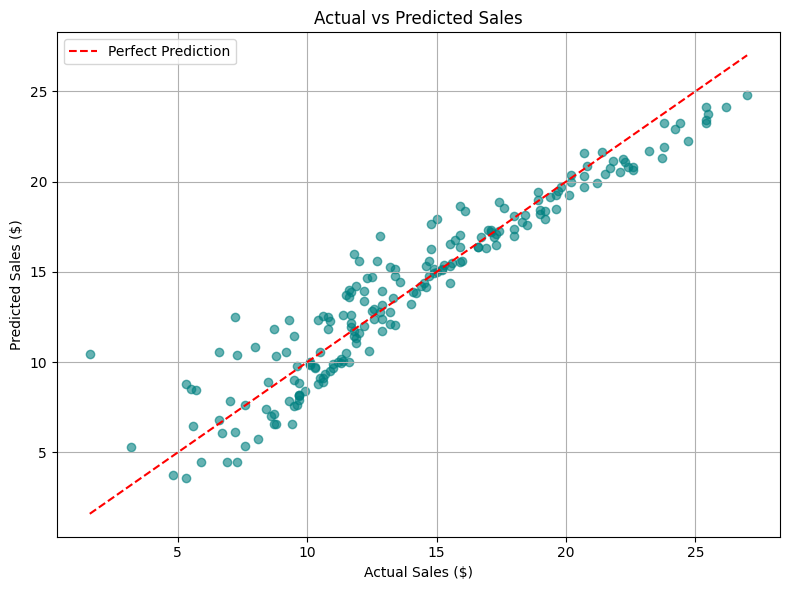

In [32]:
import matplotlib.pyplot as plt

df['Predicted Sales'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['Sales ($)'], df['Predicted Sales'], color='teal', alpha=0.6)
plt.plot([df['Sales ($)'].min(), df['Sales ($)'].max()],
         [df['Sales ($)'].min(), df['Sales ($)'].max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
